# CardioVascular Heart Disease Prediction System

# (i) Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from scipy.stats import chi2_contingency, ttest_ind, pearsonr
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


import statsmodels.api as sm
from sklearn.model_selection import train_test_split



data = pd.read_csv("heartDS.csv")  # Reading the data

# Print first few rows of the data
print(data.head())


   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [2]:
# Print dimensions of the data
print(data.shape)


(70000, 13)


In [3]:
print(data.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [4]:
print(data.describe()) # Summary statictics

                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250    

In [5]:
data1 = data.iloc[:, 1:13]
print(data1.head())


     age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   
3  17623       2     169    82.0    150    100            1     1      0   
4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [6]:
# Filter the data to select rows where ap_hi is greater than ap_lo
data1 = data1[data1['ap_hi'] > data1['ap_lo']]

print(data1.head())

# Print summary statistics of filtered data
print(data1.describe())

     age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   
3  17623       2     169    82.0    150    100            1     1      0   
4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
                age        gender        height        weight         ap_hi  \
count  68764.000000  68764.000000  68764.000000  68764.000000  68764.000000   
mean   19464.144581      1.348613    164.359752     74.113846    128.840440   
std     2468.275317      0.476535      8.190652     14.330819    155.203641   
min    10798.000000      1.000000     55.000000     11.000000     12.00

# (ii) Data Preprocessing

In [7]:
# Remove rows with missing values
data1 = data1.dropna()

# Filter the data to select rows where height is between 140 and 220, weight is greater than or equal to 30, ap_lo is between 30 and 170, and ap_hi is between 70 and 249
data1 = data1[(data1['height'] >= 140) & (data1['height'] <= 220) & (data1['weight'] >= 30) & (data1['ap_lo'] >= 30) & (data1['ap_lo'] <= 170) & (data1['ap_hi'] >= 70) & (data1['ap_hi'] < 250)]

# Print first few rows of the filtered data
print(data1.head())



     age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   
3  17623       2     169    82.0    150    100            1     1      0   
4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [8]:
# Print summary statistics of the filtered data
print(data1.describe())


                age        gender        height        weight         ap_hi  \
count  68521.000000  68521.000000  68521.000000  68521.000000  68521.000000   
mean   19464.769910      1.348725    164.463814     74.119509    126.677179   
std     2467.598213      0.476570      7.801033     14.279415     16.686006   
min    10798.000000      1.000000    140.000000     30.000000     70.000000   
25%    17658.000000      1.000000    159.000000     65.000000    120.000000   
50%    19701.000000      1.000000    165.000000     72.000000    120.000000   
75%    21324.000000      2.000000    170.000000     82.000000    140.000000   
max    23713.000000      2.000000    207.000000    200.000000    240.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  68521.000000  68521.000000  68521.000000  68521.000000  68521.000000   
mean      81.304053      1.364866      1.225756      0.088017      0.053385   
std        9.447325      0.679069      0.571619    

In [9]:
# Print dimensions of the filtered data
print(data1.shape)

(68521, 12)


# (iii) Plotting Graphs

In [10]:
# Filter the data to select rows where height is between 140 and 220, weight is greater than or equal to 30, ap_lo is between 30 and 170, and ap_hi is between 70 and 249
data2 = data1[(data1['height'] >= 140) & (data1['height'] <= 220) & 
              (data1['weight'] >= 30) & (data1['ap_lo'] >= 30) &
              (data1['ap_lo'] <= 170) & (data1['ap_hi'] >= 70) & (data1['ap_hi'] < 250)]

# Convert selected columns to factor type
cols = ["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]
data2[cols] = data2[cols].astype('category')

# Print summary statistics of the filtered data
print(data2.describe())


                age        height        weight         ap_hi         ap_lo
count  68521.000000  68521.000000  68521.000000  68521.000000  68521.000000
mean   19464.769910    164.463814     74.119509    126.677179     81.304053
std     2467.598213      7.801033     14.279415     16.686006      9.447325
min    10798.000000    140.000000     30.000000     70.000000     30.000000
25%    17658.000000    159.000000     65.000000    120.000000     80.000000
50%    19701.000000    165.000000     72.000000    120.000000     80.000000
75%    21324.000000    170.000000     82.000000    140.000000     90.000000
max    23713.000000    207.000000    200.000000    240.000000    170.000000


In [11]:
# Split the data into train, test, and validation sets
idx = np.random.choice(np.arange(1, 4), size=data2.shape[0], replace=True, p=[0.7, 0.15, 0.15])
train = data2[idx == 1]
test = data2[idx == 2]
valid = data2[idx == 3]

# Print summary statistics of the train data
print(train.describe())

                age        height        weight        ap_hi         ap_lo
count  47966.000000  47966.000000  47966.000000  47966.00000  47966.000000
mean   19460.863174    164.428199     74.064370    126.67356     81.312701
std     2465.467500      7.798318     14.254366     16.75778      9.444616
min    10798.000000    140.000000     30.000000     70.00000     30.000000
25%    17658.000000    159.000000     65.000000    120.00000     80.000000
50%    19697.000000    165.000000     72.000000    120.00000     80.000000
75%    21317.000000    170.000000     82.000000    140.00000     90.000000
max    23701.000000    207.000000    200.000000    240.00000    170.000000


In [12]:
# Print dimensions of the train, test, and validation sets
print(train.shape)
print(test.shape)
print(valid.shape)



(47966, 12)
(10321, 12)
(10234, 12)


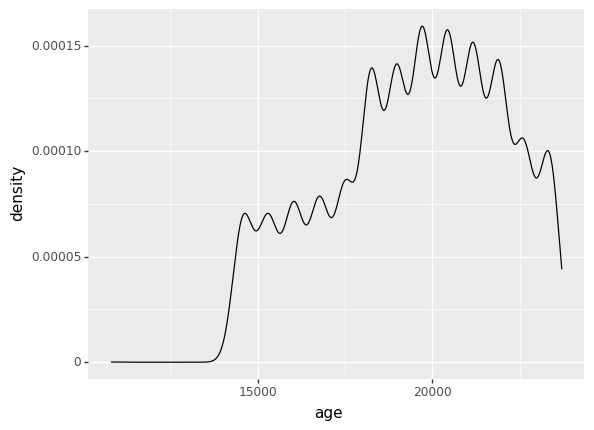

<ggplot: (180295767498)>

In [13]:
# Create a density plot of age
ggplot(train, aes(x='age')) + geom_density()


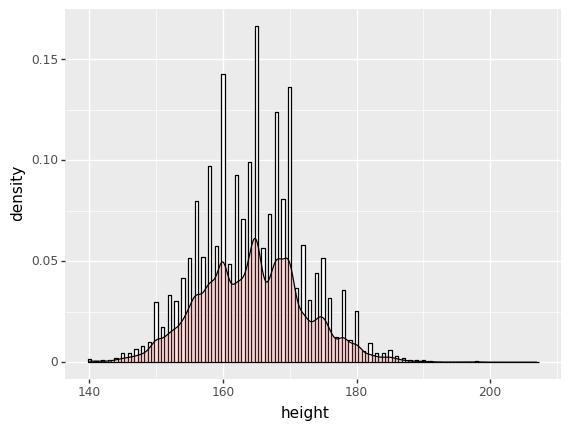

<ggplot: (180296611057)>

In [14]:

# Create a histogram and density plot of height
ggplot(train, aes(x='height')) + geom_histogram(aes(y='..density..'), binwidth=.5, colour="black", fill="white") +geom_density(alpha=.2, fill="#FF6666")

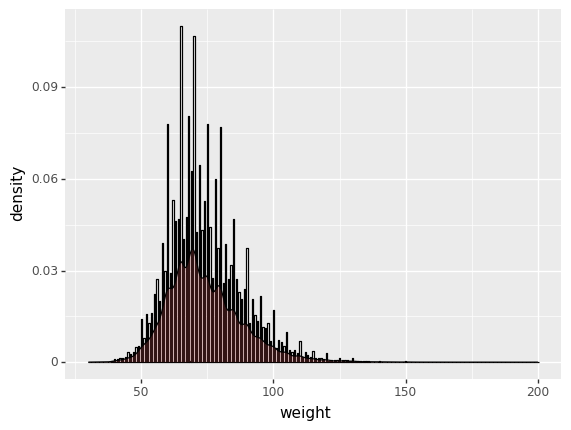

<ggplot: (180296143002)>

In [15]:
# Create a histogram and density plot of weight
ggplot(train, aes(x='weight')) + geom_histogram(aes(y='..density..'), binwidth=.5, colour="black", fill="white") + geom_density(alpha=.2, fill="#FF6666")

In [16]:
# Calculate the correlation matrix of selected variables in the train data
train_corr = train.iloc[:, [0, 2, 3, 4, 5]].corr()
print(train_corr)



             age    height    weight     ap_hi     ap_lo
age     1.000000 -0.085787  0.056290  0.211858  0.156537
height -0.085787  1.000000  0.313130  0.020463  0.036477
weight  0.056290  0.313130  1.000000  0.269448  0.254460
ap_hi   0.211858  0.020463  0.269448  1.000000  0.733550
ap_lo   0.156537  0.036477  0.254460  0.733550  1.000000


In [17]:
sns.heatmap(train_corr, annot=True, cmap='coolwarm')

<AxesSubplot:>

In [18]:
weight_chol_test = stats.ttest_ind(train[train['cholesterol'] == 1]['weight'], train[train['cholesterol'] == 2]['weight'], equal_var=True)
print(weight_chol_test)


sns.boxplot(data=train, x='cholesterol', y='weight')

height_weight_corr = stats.pearsonr(train['height'], train['weight'])
print(height_weight_corr)

Ttest_indResult(statistic=-18.293442295632968, pvalue=1.806492383682099e-74)
PearsonRResult(statistic=0.3131303026236506, pvalue=0.0)


In [19]:

gender_smoke_table = pd.crosstab(train['gender'], train['smoke'])
gender_smoke_chi2, gender_smoke_p, gender_smoke_dof, gender_smoke_expected = stats.chi2_contingency(gender_smoke_table, correction=False)
print(gender_smoke_chi2, gender_smoke_p)

train['age'] = train['age'] / 365
test['age'] = test['age'] / 365
valid['age'] = valid['age'] / 365

train.describe()

5543.260704986586 0.0


C:\Users\laxmi\AppData\Local\Temp\ipykernel_7084\686492678.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\laxmi\AppData\Local\Temp\ipykernel_7084\686492678.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\laxmi\AppData\Local\Temp\ipykernel_7084\686492678.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,age,height,weight,ap_hi,ap_lo
count,47966.000000,47966.000000,47966.000000,47966.00000,47966.000000
mean,53.317433,164.428199,74.064370,126.67356,81.312701
std,6.754705,7.798318,14.254366,16.75778,9.444616
min,29.583562,140.000000,30.000000,70.00000,30.000000
25%,48.378082,159.000000,65.000000,120.00000,80.000000
50%,53.964384,165.000000,72.000000,120.00000,80.000000
75%,58.402740,170.000000,82.000000,140.00000,90.000000
max,64.934247,207.000000,200.000000,240.00000,170.000000


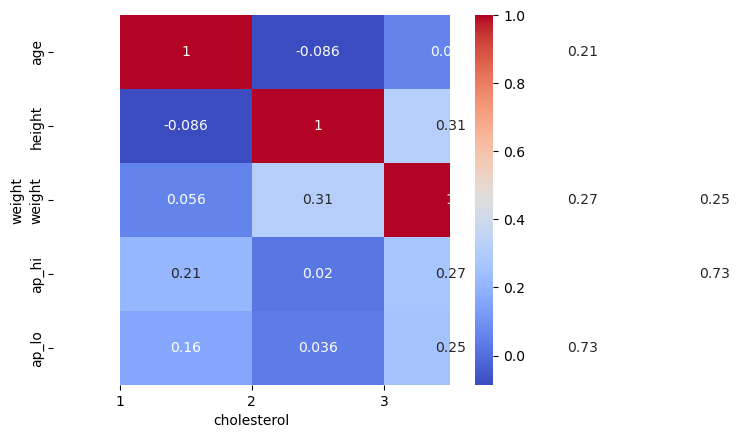

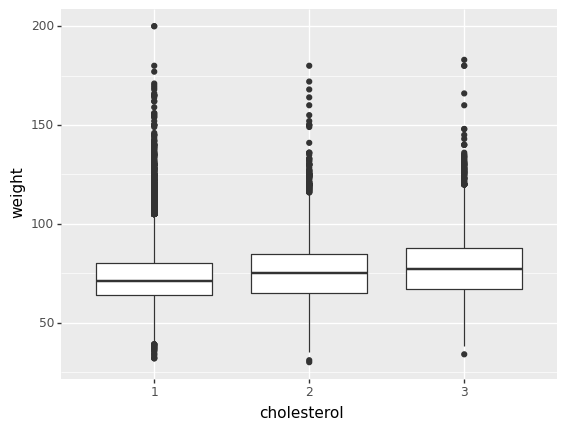

<ggplot: (180296152468)>

In [20]:
# Create a boxplot to visualize the distribution of weight across levels of cholesterol
ggplot(train, aes(x='cholesterol', y='weight')) + geom_boxplot()


# (iv)Creating BMI row to analyze with Body mass index instead of using weight and height plainly

In [21]:
train['BMI'] = None
train['BMI'] = train['weight'] / ((train['height'] / 100) ** 2)

test['BMI'] = None
test['BMI'] = test['weight'] / ((test['height'] / 100) ** 2)

valid['BMI'] = None
valid['BMI'] = valid['weight'] / ((valid['height'] / 100) ** 2)


C:\Users\laxmi\AppData\Local\Temp\ipykernel_7084\1395030687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\laxmi\AppData\Local\Temp\ipykernel_7084\1395030687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\laxmi\AppData\Local\Temp\ipykernel_7084\1395030687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

# LINEAR REGRESSION

In [22]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# fit logistic regression model
model = sm.formula.glm(formula='cardio~age+ gender + BMI + ap_hi + ap_lo + cholesterol + gluc + smoke + alco + active + (ap_hi*ap_lo) + (gender*smoke)', data=train, family=sm.families.Binomial()).fit()

# print summary of model
print(model.summary())


                     Generalized Linear Model Regression Results                      
Dep. Variable:     ['cardio[0]', 'cardio[1]']   No. Observations:                47966
Model:                                    GLM   Df Residuals:                    47951
Model Family:                        Binomial   Df Model:                           14
Link Function:                          Logit   Scale:                          1.0000
Method:                                  IRLS   Log-Likelihood:                -26829.
Date:                        Wed, 12 Apr 2023   Deviance:                       53657.
Time:                                13:18:10   Pearson chi2:                 5.56e+04
No. Iterations:                             5   Pseudo R-squ. (CS):             0.2347
Covariance Type:                    nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

In [23]:
# add predicted probabilities to train data
train['prob'] = model.predict(train)

# add predicted class to train data
train['pred'] = ['Yes' if x >= 0.50 else 'No' for x in train['prob']]

# print confusion matrix
print(pd.crosstab(train['pred'], train['cardio']))
#print(accuracy_score(train['pred'], train['cardio']))

cardio      0      1
pred                
No       5136  15871
Yes     19090   7869


C:\Users\laxmi\AppData\Local\Temp\ipykernel_7084\2517348953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\laxmi\AppData\Local\Temp\ipykernel_7084\2517348953.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Logistic Regression

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


fit_control = KFold(n_splits=10, shuffle=True, random_state=8)
train = train.dropna()
X = train.drop(['cardio', 'pred', 'prob'], axis=1)
y = train['cardio']
model_lr = LogisticRegression(fit_intercept=True, solver='liblinear', random_state=8)
scores = cross_val_score(model_lr, X, y, cv=fit_control, scoring='accuracy')
print(scores)
print('CV accuracy:', np.mean(scores))


[0.72878883 0.72170106 0.72545341 0.73400042 0.73608505 0.7329581
 0.71455379 0.72998332 0.72456214 0.72789825]
CV accuracy: 0.7275984364706674


In [25]:
model_lr.fit(X, y)
print(model_lr.coef_)

[[ 0.05100634  0.02127689 -0.06210097  0.07112485  0.05562856  0.01155134
   0.49988885 -0.13117959 -0.12220344 -0.27397018 -0.23061967 -0.16056343]]


In [26]:
print(model_lr.intercept_)


[-1.66816306]


In [27]:
print(X.columns)


Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'BMI'],
      dtype='object')


In [28]:
print(train.head())

         age gender  height  weight  ap_hi  ap_lo cholesterol gluc smoke alco  \
0  50.391781      2     168    62.0    110     80           1    1     0    0   
1  55.419178      1     156    85.0    140     90           3    1     0    0   
2  51.663014      1     165    64.0    130     70           3    1     0    0   
8  48.405479      1     158    71.0    110     70           1    1     0    0   
9  54.339726      1     164    68.0    110     60           1    1     0    0   

  active cardio        BMI      prob pred  
0      1      0  21.967120  0.794778  Yes  
1      1      1  34.927679  0.110015   No  
2      0      1  23.507805  0.263683   No  
8      1      0  28.440955  0.812461  Yes  
9      0      0  25.282570  0.761767  Yes  


# PROBABILITY TESTING

In [29]:
test['prob'] = model.predict(test)
test['pred'] = np.where(test['prob'] >= 0.50, 'Yes', 'No')
table = pd.crosstab(test['pred'], test['cardio'])
print(table)

cardio     0     1
pred              
No      1091  3440
Yes     4063  1727


C:\Users\laxmi\AppData\Local\Temp\ipykernel_7084\3183840316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\laxmi\AppData\Local\Temp\ipykernel_7084\3183840316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# NAVIE BAYES

In [30]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X, y)

train_predict = NB.predict(test.iloc[:, :-3])
cm = confusion_matrix(train_predict, test['cardio'])
print(cm)


C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- cardio
Feature names seen at fit time, yet now missing:
- BMI



[[2979 1118]
 [2175 4049]]


# RANDOM FOREST

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd


# one-hot encoding of categorical variables
train = pd.get_dummies(data, columns=['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'])
test = pd.get_dummies(data, columns=['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'])

X_train = train.drop(['cardio'], axis=1)
y_train = train['cardio']
X_test = test.drop(['cardio'], axis=1)
y_test = test['cardio']

random_f = RandomForestClassifier(random_state=100)
random_f.fit(X_train, y_train)

a = random_f.predict(X_test)
cf = confusion_matrix(y_test, a)
print(cf)



[[35021     0]
 [    2 34977]]


In [32]:
print(accuracy_score(y_train, a))

0.9999714285714286


# Decision Tree

In [33]:
df = pd.read_csv('heartDS.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [34]:
df = df.drop('id', axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [35]:
df['age'] = np.round(df['age'] / 365.25)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [36]:
df_new = pd.get_dummies(df, columns=['cholesterol', 'gluc'])
df_new.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,50.0,2,168,62.0,110,80,0,0,1,0,1,0,0,1,0,0
1,55.0,1,156,85.0,140,90,0,0,1,1,0,0,1,1,0,0
2,52.0,1,165,64.0,130,70,0,0,0,1,0,0,1,1,0,0
3,48.0,2,169,82.0,150,100,0,0,1,1,1,0,0,1,0,0
4,48.0,1,156,56.0,100,60,0,0,0,0,1,0,0,1,0,0


In [37]:
X = df_new.drop('cardio', axis=1)
y = df_new['cardio']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=22)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
y_pred = tree.predict(X_valid)
print(accuracy_score(y_valid, y_pred))

0.6345714285714286
